## ***Modelo de Machine Learning de Predicción Prophet***

In [2]:
import pandas as pd

### Usaremos el dataset de ingresos para preveer la tendencia de las ganancias del internet fijo

In [3]:
ingresos= pd.read_csv('D:/Melissa/Data Analitycs Enacom/ingresos_internet_fijo.csv')
ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51432896,Ene-Mar 2022
1,2021,4,45467887,Oct-Dic 2021
2,2021,3,42999944,Jul-Sept 2021
3,2021,2,38239667,Abr-Jun 2021
4,2021,1,36676371,Ene-Mar 2021
5,2020,4,33539703,Oct-Dic 2020
6,2020,3,31997445,Jul-Sept 2020
7,2020,2,32102476,Abr-Jun 2020
8,2020,1,29946216,Ene-Mar 2020
9,2019,4,24169251,Oct-Dic 2019


In [17]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        33 non-null     int64 
 1   Trimestre                  33 non-null     int64 
 2   Ingresos (miles de pesos)  33 non-null     int64 
 3   Periodo                    33 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [7]:
ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,33.000000,33.000000,3.300000e+01
mean,2017.636364,2.454545,1.784991e+07
std,2.421495,1.148121,1.418885e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,5.936845e+06
50%,2018.000000,2.000000,1.317146e+07
75%,2020.000000,3.000000,2.994622e+07
max,2022.000000,4.000000,5.143290e+07


#### ***Importamos la librerías para el modelo de machine learning Prophet*** 
#### Prophet es una de las librerías más avanzadas para predecir series temporales

In [4]:
from prophet import Prophet
from datetime import datetime
import matplotlib.ticker as ticker

d:\Melissa\Data Analitycs Enacom\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


#### ***Hiperparametros del modelo Prophet***
##### **growth:** Especifica el tipo de tendencia a modelar ('linear' o 'logistic'). Por defecto es 'linear'.
##### **changepoint_prior_scale:** Controla la flexibilidad del modelo. Un valor alto permitirá que se ajuste mejor a los datos, pero también puede provocar overfitting. Por defecto es 0.05.
##### **seasonality_prior_scale:** Controla la importancia relativa de la estacionalidad. Un valor alto dará más importancia a la estacionalidad, mientras que un valor bajo dará más importancia a la tendencia. Por defecto es 10.0.
##### **changepoints:** Permite especificar los puntos de cambio de la tendencia. Por defecto son los años 25, 50, 75 y 100, pero se pueden especificar otros valores.
##### **seasonality_mode:** Permite especificar el modo de la estacionalidad ('additive' o 'multiplicative'). Por defecto es 'additive'.
##### **yearly_seasonality:** Permite habilitar o deshabilitar la estacionalidad anual. Por defecto es True.
##### **weekly_seasonality:** Permite habilitar o deshabilitar la estacionalidad semanal. Por defecto es False.
##### **daily_seasonality:** Permite habilitar o deshabilitar la estacionalidad diaria. Por defecto es False.

In [11]:


def prophet_model(ingresos):
    # Concatenar las columnas de año y trimestre en una nueva columna con formato fecha ya que en el modelo se debe tener una variable de tiempo con el tipo de dato datetime.
    ingresos['Fecha'] = pd.to_datetime(ingresos['Año'].astype(str) + 'Q' + ingresos['Trimestre'].astype(str))
    
    # Crear un DataFrame con las columnas 'ds' y 'y' requeridas por Prophet
    df = ingresos[['Fecha', 'Ingresos (miles de pesos)']]
    df.columns = ['ds', 'y']
    
    # Crear y entrenar el modelo Prophet
    model = Prophet(
        growth='linear',
        changepoint_prior_scale=0.1,
        seasonality_prior_scale=20.0,
        changepoints=['2014-01-01', '2017-01-01', '2020-01-01', '2022-01-01'],
        seasonality_mode='multiplicative',
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False )
    model.fit(df)
    
    # Crear un DataFrame con las fechas de los próximos trimestres del año entrante
    future_dates = model.make_future_dataframe(periods=10, freq='Q')
    
    # Realizar las predicciones para el próximo año
    forecast = model.predict(future_dates)

    # Mostrar gráfica con los resultados
    fig = model.plot(forecast, ylabel='Ingresos (miles de pesos)', xlabel='Fechas')
    fig.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

    # # Mostrar gráfica con las tendencias
    fig2 = model.plot_components(forecast)
    
    return forecast.tail(10)

#### ***Modelo en Producción***

20:52:59 - cmdstanpy - INFO - Chain [1] start processing
20:53:01 - cmdstanpy - INFO - Chain [1] done processing


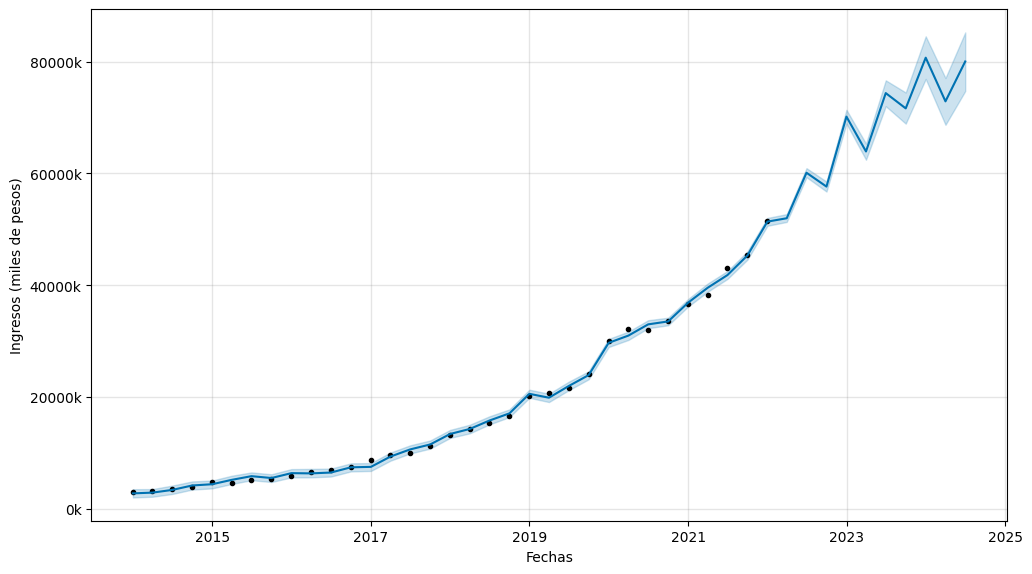

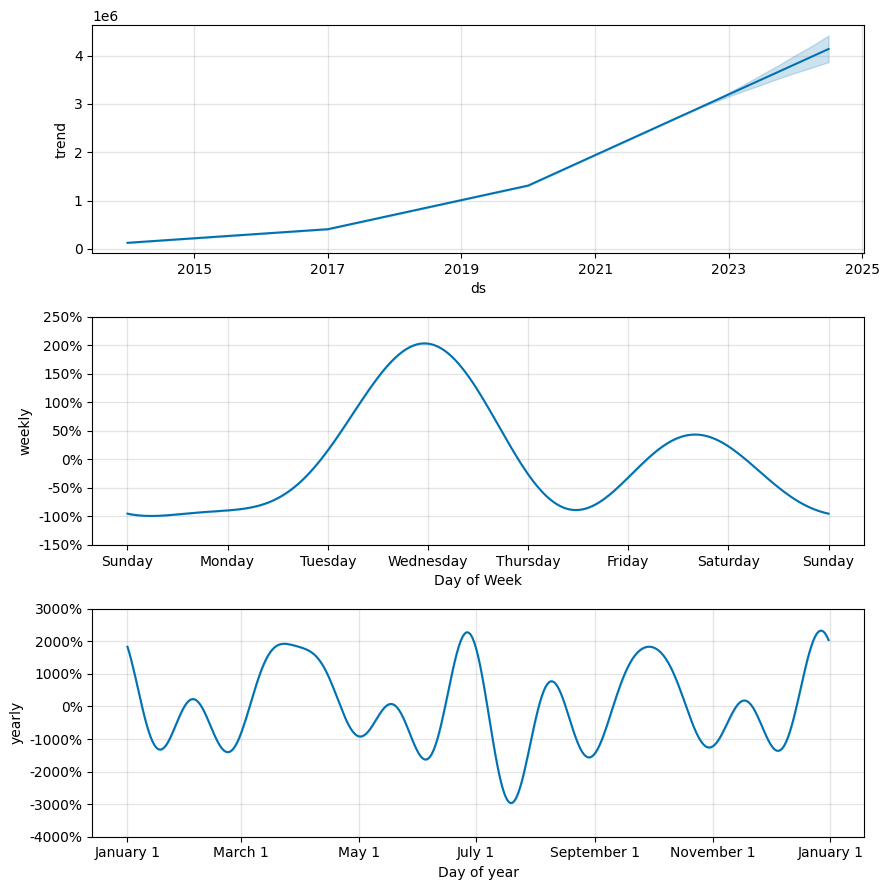

In [12]:
result = prophet_model(ingresos)

##### **ds:** Esta columna contiene las fechas para las que se realizó la predicción.
##### **trend:** Esta columna muestra la tendencia general de los datos de ingresos a lo largo del tiempo.
##### **yhat_lower:** Esta columna muestra la predicción más baja de los ingresos para cada fecha, es decir, el valor mínimo que se espera que alcancen los ingresos en cada trimestre.
##### **yhat_upper:** Esta columna muestra la predicción más alta de los ingresos para cada fecha, es decir, el valor máximo que se espera que alcancen los ingresos en cada trimestre.
##### **trend_lower:** Esta columna muestra el límite inferior de la tendencia general de los datos de ingresos a lo largo del tiempo.
##### **trend_upper:** Esta columna muestra el límite superior de la tendencia general de los datos de ingresos a lo largo del tiempo.
##### **multiplicative_terms:** Esta columna muestra los términos multiplicativos del modelo, es decir, los efectos que no están relacionados con la tendencia general de los datos, como los efectos estacionales y los efectos de días festivos.
##### **multiplicative_terms_lower:** Esta columna muestra el límite inferior de los términos multiplicativos del modelo.
##### **multiplicative_terms_upper:** Esta columna muestra el límite superior de los términos multiplicativos del modelo.
##### **weekly:** Esta columna muestra el efecto semanal en la predicción de ingresos.
##### **weekly_lower:** Esta columna muestra el límite inferior del efecto semanal en la predicción de ingresos.
##### **weekly_upper:** Esta columna muestra el límite superior del efecto semanal en la predicción de ingresos.
##### **yearly:** Esta columna muestra el efecto anual en la predicción de ingresos.
##### **yearly_lower:** Esta columna muestra el límite inferior del efecto anual en la predicción de ingresos.
##### **yearly_upper:** Esta columna muestra el límite superior del efecto anual en la predicción de ingresos.
##### **additive_terms:** Esta columna muestra los términos aditivos del modelo, es decir, los efectos que se suman a la tendencia general de los datos.
##### **additive_terms_lower:** Esta columna muestra el límite inferior de los términos aditivos del modelo.
##### **additive_terms_upper:** Esta columna muestra el límite superior de los términos aditivos del modelo.
##### **yhat:** Esta columna muestra la predicción de ingresos para cada fecha, es decir, el valor medio que se espera que alcancen los ingresos en cada trimestre.

In [9]:
result.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
30,2021-07-01,2.252129e+06,4.109654e+07,4.259366e+07,2.252129e+06,2.252129e+06,17.568938,17.568938,17.568938,-0.259362,-0.259362,-0.259362,17.828300,17.828300,17.828300,0.0,0.0,0.0,4.181965e+07
31,2021-10-01,2.410378e+06,4.469387e+07,4.608810e+07,2.410378e+06,2.410378e+06,17.804945,17.804945,17.804945,-0.316275,-0.316275,-0.316275,18.121219,18.121219,18.121219,0.0,0.0,0.0,4.532703e+07
32,2022-01-01,2.568627e+06,5.064674e+07,5.210558e+07,2.568627e+06,2.568627e+06,19.002673,19.002673,19.002673,0.230140,0.230140,0.230140,18.772533,18.772533,18.772533,0.0,0.0,0.0,5.137941e+07
33,2022-03-31,2.721715e+06,5.119001e+07,5.272501e+07,2.721715e+06,2.721715e+06,18.099103,18.099103,18.099103,-0.259362,-0.259362,-0.259362,18.358465,18.358465,18.358465,0.0,0.0,0.0,5.198232e+07
34,2022-06-30,2.878243e+06,5.930787e+07,6.098158e+07,2.871557e+06,2.879309e+06,19.888548,19.888548,19.888548,-0.259362,-0.259362,-0.259362,20.147910,20.147910,20.147910,0.0,0.0,0.0,6.012232e+07
35,2022-09-30,3.036491e+06,5.667265e+07,5.855439e+07,3.009208e+06,3.051728e+06,17.984956,17.984956,17.984956,-0.316275,-0.316275,-0.316275,18.301231,18.301231,18.301231,0.0,0.0,0.0,5.764766e+07
36,2022-12-31,3.194740e+06,6.892400e+07,7.146434e+07,3.141158e+06,3.230830e+06,20.962923,20.962923,20.962923,0.230140,0.230140,0.230140,20.732783,20.732783,20.732783,0.0,0.0,0.0,7.016582e+07
37,2023-03-31,3.349548e+06,6.227197e+07,6.546236e+07,3.267812e+06,3.423887e+06,18.085557,18.085557,18.085557,-0.316275,-0.316275,-0.316275,18.401832,18.401832,18.401832,0.0,0.0,0.0,6.392798e+07
38,2023-06-30,3.506076e+06,7.201816e+07,7.685746e+07,3.392476e+06,3.627999e+06,20.212419,20.212419,20.212419,-0.316275,-0.316275,-0.316275,20.528694,20.528694,20.528694,0.0,0.0,0.0,7.437235e+07
39,2023-09-30,3.664324e+06,6.855719e+07,7.483819e+07,3.507471e+06,3.829289e+06,18.549554,18.549554,18.549554,0.230140,0.230140,0.230140,18.319414,18.319414,18.319414,0.0,0.0,0.0,7.163590e+07


#### ***Transformamos el resultado a CSV para graficar la predicción en Power BI***

In [13]:
result.to_csv('D:/Melissa/Data Analitycs Enacom/forecast_result.csv', index=False)